100%|██████████| 7.50k/7.50k [00:00<00:00, 4.21MB/s]

Extracting files...
Ruta del dataset: /Users/hugoide/.cache/kagglehub/datasets/sahityapalacharla/harry-potter-sorting-dataset/versions/1
Archivos en carpeta: ['harry_potter_1000_students.csv']

Vista previa:
  Blood Status  Bravery  Intelligence  Loyalty  Ambition  Dark Arts Knowledge  \
0   Half-blood        9             4        7         5                    0   
1  Muggle-born        6             8        5         7                    5   
2   Pure-blood        1             4        7         7                    1   
3   Pure-blood        9             1        3         4                    1   
4  Muggle-born        5             9        7         3                    3   

   Quidditch Skills  Dueling Skills  Creativity       House  
0                 8               8           7  Gryffindor  
1                 6               4           9   Ravenclaw  
2                 4               4           6  Hufflepuff  
3                 9              10           1  Gryffind

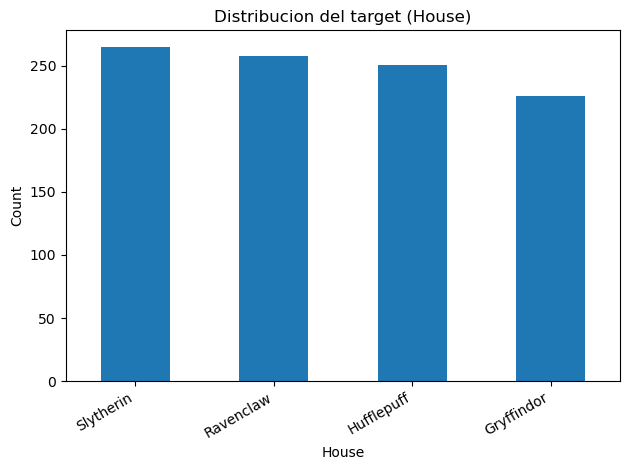


Columnas categoricas: ['Blood Status']
Columnas numericas: ['Bravery', 'Intelligence', 'Loyalty', 'Ambition', 'Dark Arts Knowledge', 'Quidditch Skills', 'Dueling Skills', 'Creativity']

Describe numericas:
           Bravery  Intelligence      Loyalty     Ambition  \
count  1000.000000    1000.00000  1000.000000  1000.000000   
mean      5.026000       5.28100     5.129000     5.136000   
std       2.682633       2.66179     2.695111     2.716041   
min       1.000000       1.00000     1.000000     1.000000   
25%       3.000000       3.00000     3.000000     3.000000   
50%       5.000000       5.00000     5.000000     5.000000   
75%       7.000000       7.00000     7.000000     7.000000   
max      10.000000      10.00000    10.000000    10.000000   

       Dark Arts Knowledge  Quidditch Skills  Dueling Skills   Creativity  
count          1000.000000        1000.00000     1000.000000  1000.000000  
mean              4.040000           5.46000        6.223000     5.208000  
std   

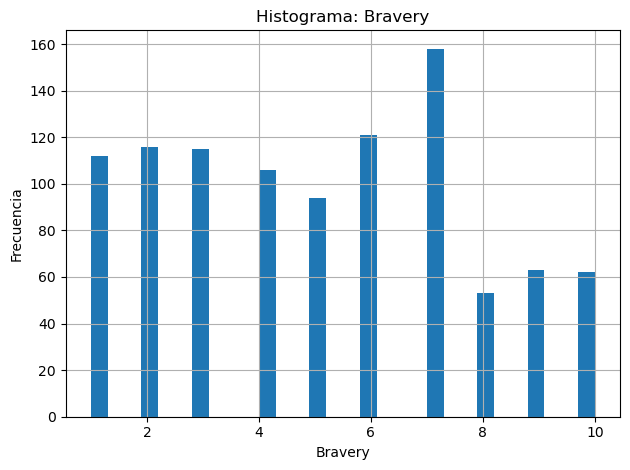

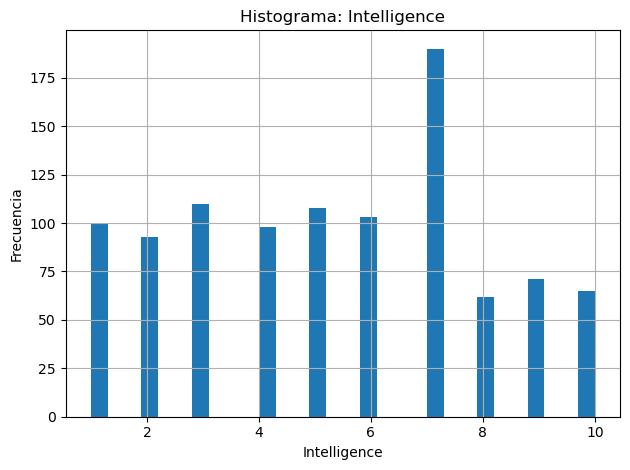

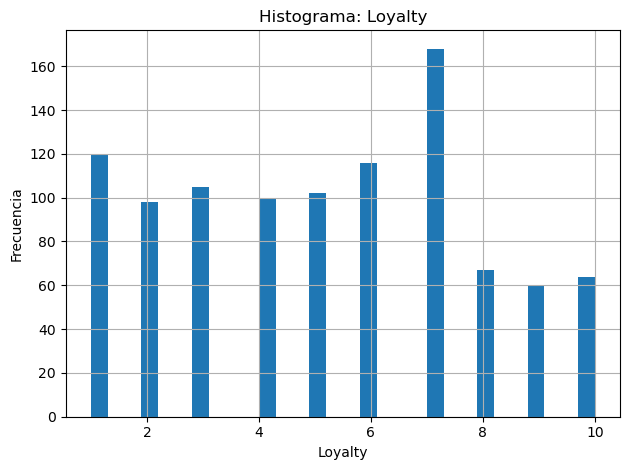

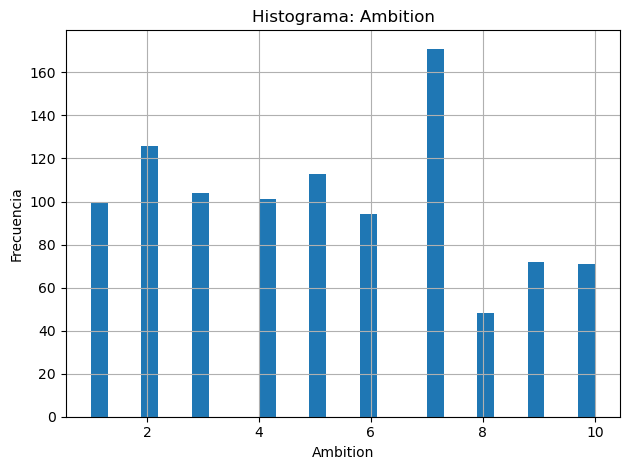

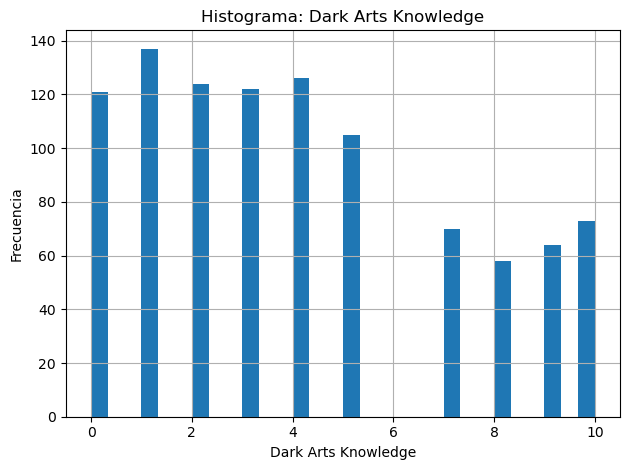

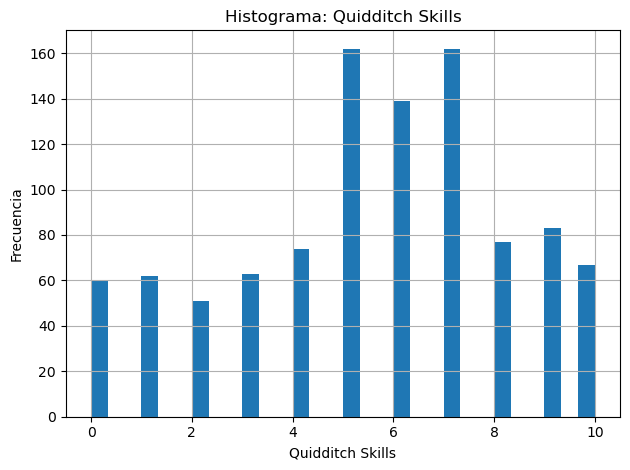

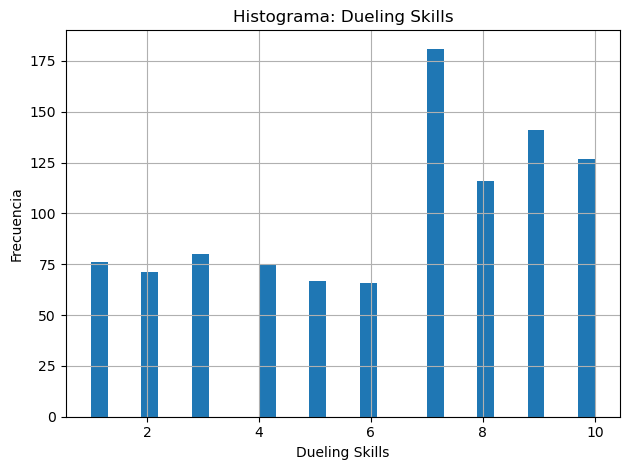

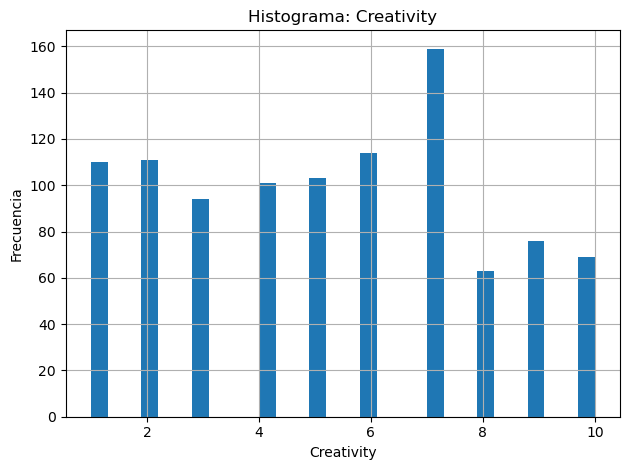

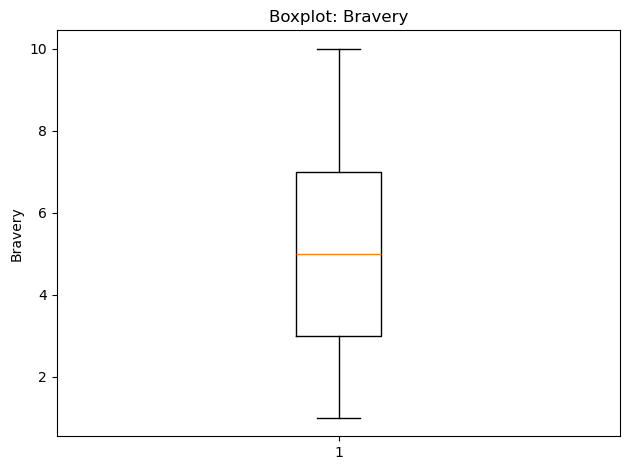

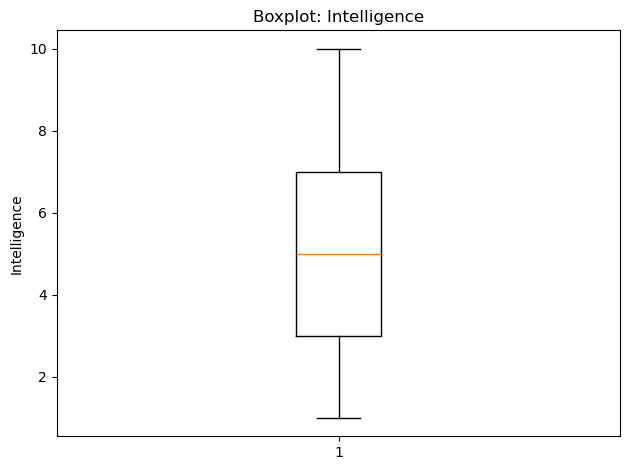

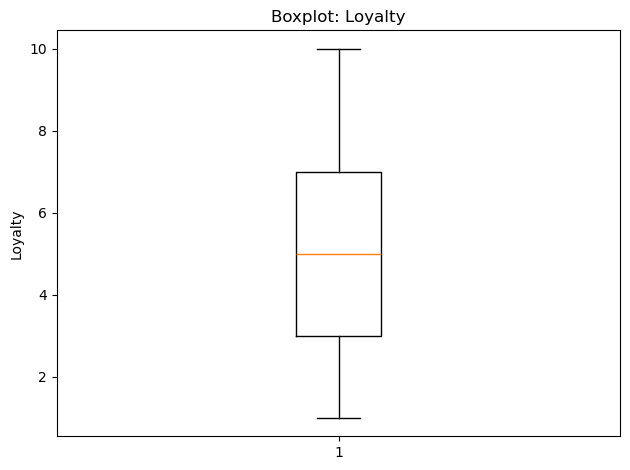

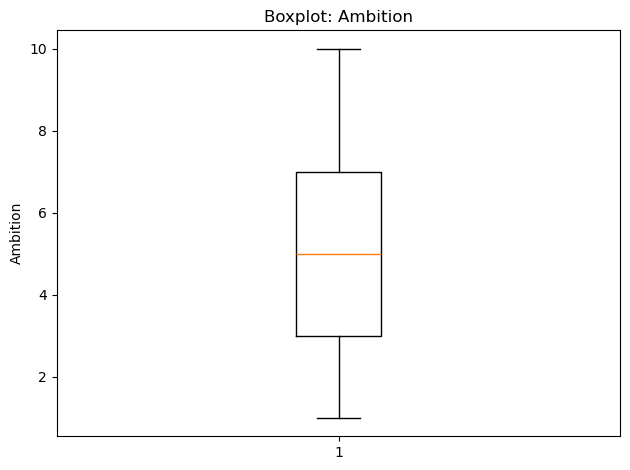

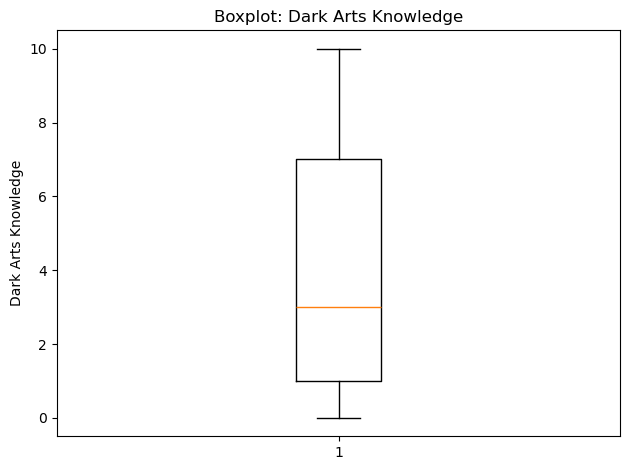

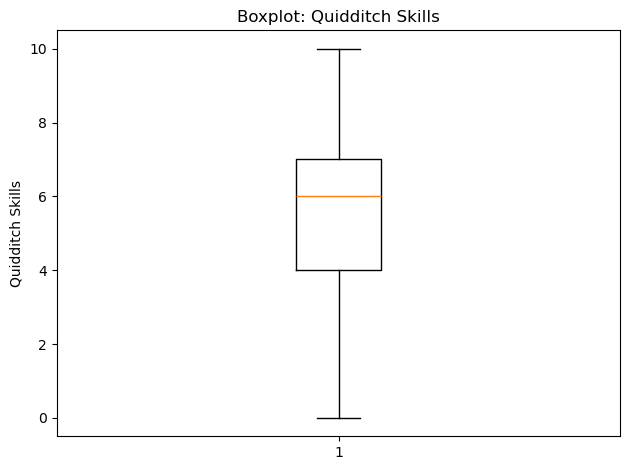

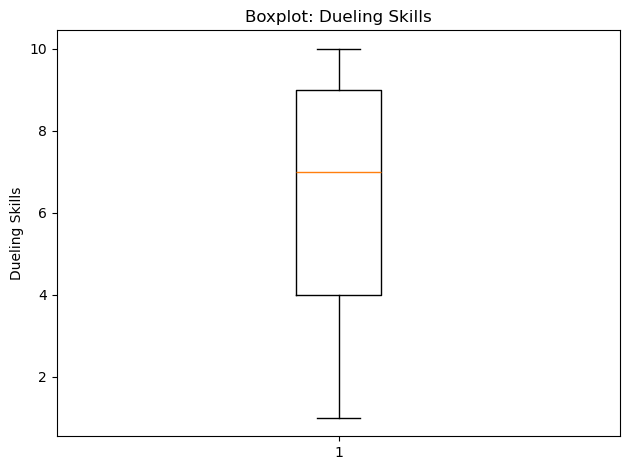

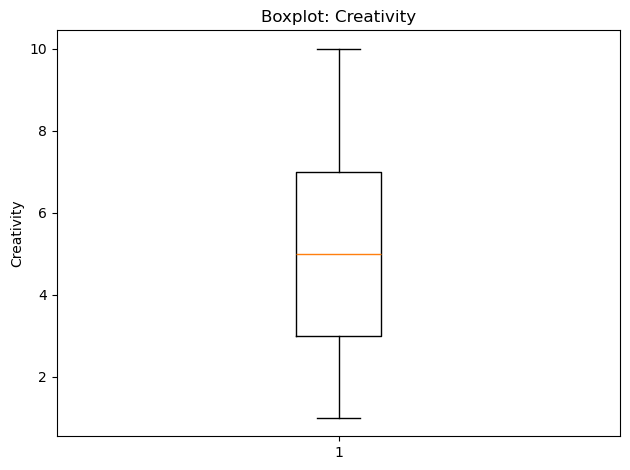

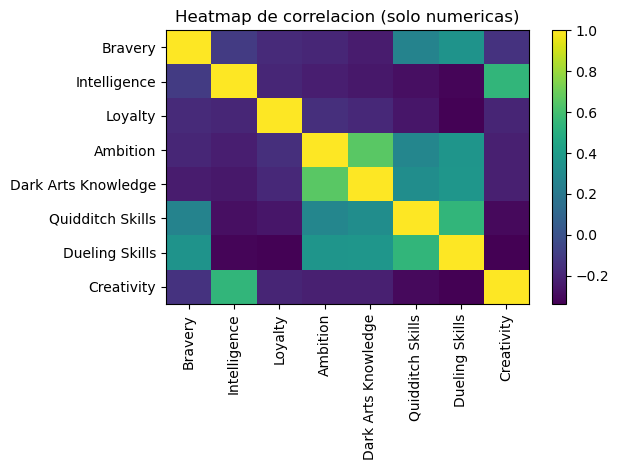

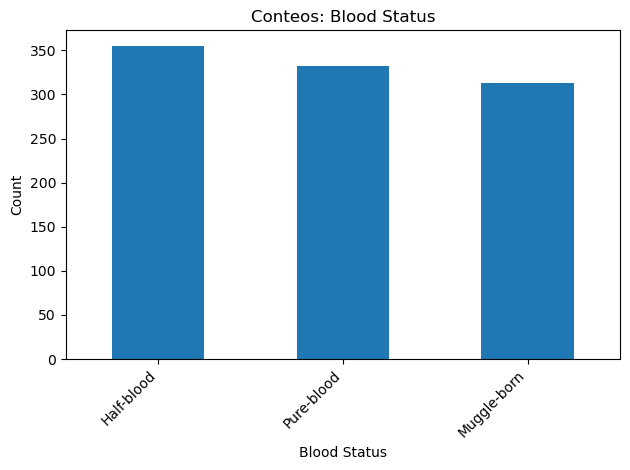


Clases: ['Gryffindor' 'Hufflepuff' 'Ravenclaw' 'Slytherin']

Tamanos:
X_train: (800, 9) | X_test: (200, 9)

========== Entrenando Logistic Regression ==========
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Mejores params: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Mejor score CV: 0.9963107942157066
Score test F1 macro: 0.9950975680092281


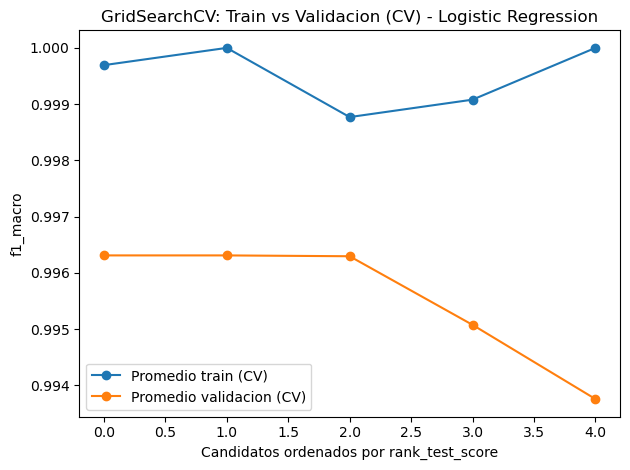


========== Entrenando Random Forest ==========
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Mejores params: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Mejor score CV: 0.9963111706083593
Score test F1 macro: 0.9950975680092281


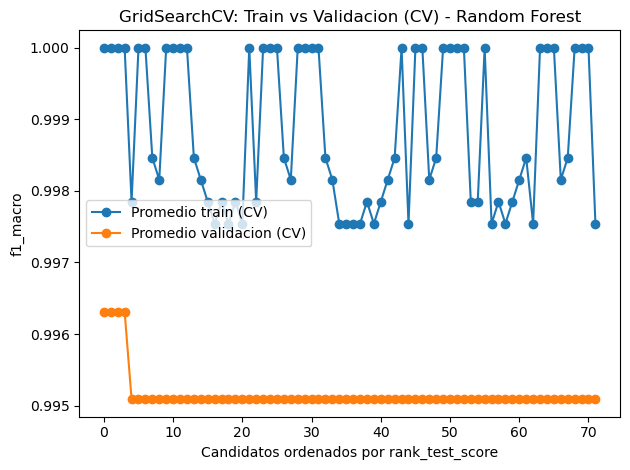


========== Entrenando SVM ==========
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Mejores params: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Mejor score CV: 0.9975304878048782
Score test F1 macro: 0.9950975680092281


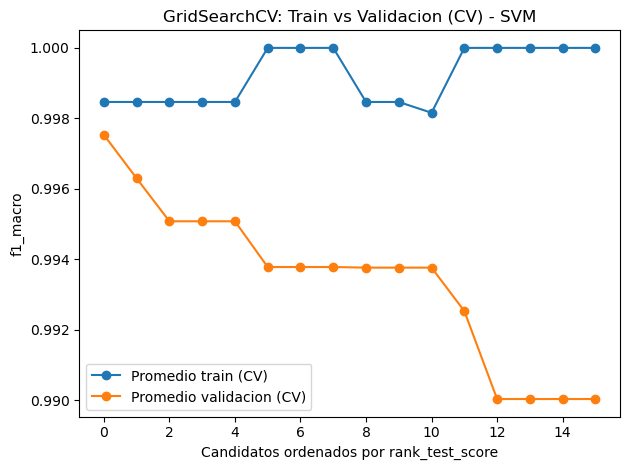


========== Comparacion de modelos ==========
Logistic Regression: CV f1=0.9963 | Test f1=0.9951
Random Forest: CV f1=0.9963 | Test f1=0.9951
SVM: CV f1=0.9975 | Test f1=0.9951

Mejor modelo seleccionado: Logistic Regression

Reporte de clasificacion (TEST):
              precision    recall  f1-score   support

  Gryffindor       1.00      1.00      1.00        45
  Hufflepuff       0.98      1.00      0.99        50
   Ravenclaw       1.00      0.98      0.99        52
   Slytherin       1.00      1.00      1.00        53

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



<Figure size 640x480 with 0 Axes>

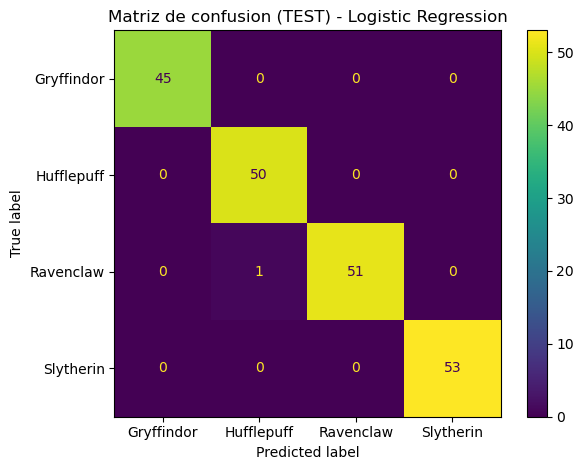

<Figure size 640x480 with 0 Axes>

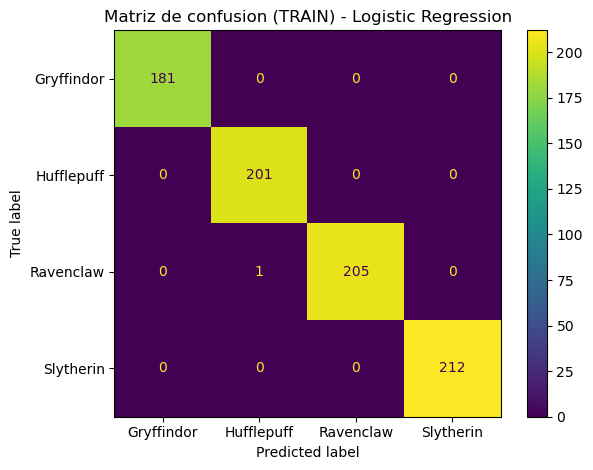


Logistic Regression - Comparacion TRAIN vs TEST (deteccion overfitting)
Train F1(macro): 0.9988 | Test F1(macro): 0.9951
Train Acc      : 0.9988 | Test Acc      : 0.9950
Train BalAcc   : 0.9988 | Test BalAcc   : 0.9952
Diferencia F1 (train - test): 0.0037
OK: no hay senal fuerte de overfitting segun gap de F1.


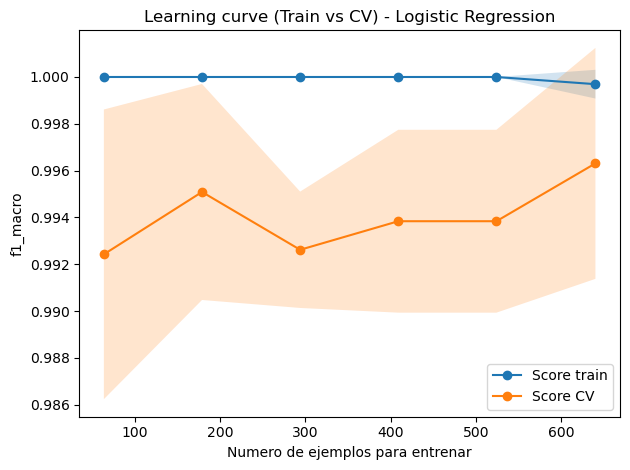

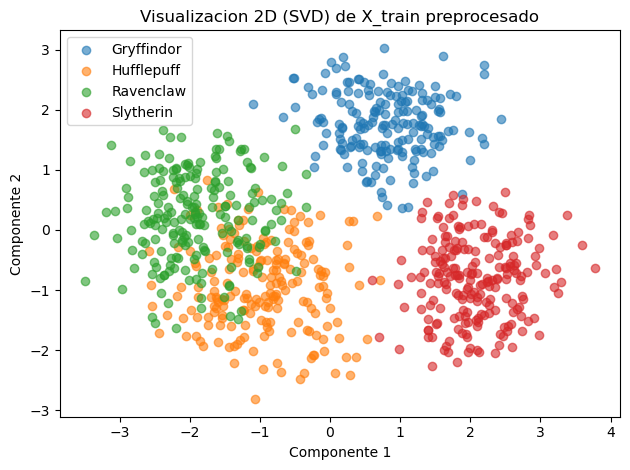


Modelo guardado en: models/best_model_logistic_regression.joblib
LabelEncoder guardado en: models/label_encoder.joblib

Check rapido: F1 macro con modelo cargado:
0.9950975680092281

Ejemplo inferencia con 1 fila:
Pred encoded: 3
Pred label: Slytherin

LISTO: pipeline completo + exportacion joblib.


In [1]:
# ============================================================
# PIPELINE COMPLETO ML (CLASIFICACION) + EXPORTACION CON JOBLIB
# Incluye:
# - EDA (analisis exploratorio)
# - Preprocesamiento (imputacion, escalado, one-hot)
# - Entrenamiento de 3 modelos
# - GridSearchCV para cada modelo
# - Seleccion del mejor modelo segun f1_macro (test)
# - Evaluacion final con:
#     * classification report
#     * matrices de confusion (train y test)
#     * graficas GridSearch (train vs CV)
#     * learning curve (para detectar overfitting)
#     * visualizacion 2D (SVD) de la data preprocesada
#     * feature importance si gana RandomForest
# - Exporta el mejor pipeline completo (preprocesamiento + modelo) con joblib
#
# IMPORTANTE:
# - Comentarios en espanol SIN acentos
# ============================================================

# ==============================
# 1) IMPORTS
# ==============================
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    balanced_accuracy_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.decomposition import TruncatedSVD

import joblib


# ==============================
# 2) FUNCIONES AUXILIARES
# ==============================
def plot_bar_counts(series, title, xlabel, ylabel="Count", rotate=45):
    # Grafica conteos de una columna (value_counts)
    counts = series.value_counts()
    plt.figure()
    counts.plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotate, ha="right")
    plt.tight_layout()
    plt.show()


def plot_numeric_histograms(df, numeric_cols, bins=30):
    # Histogramas para variables numericas (una figura por columna)
    if len(numeric_cols) == 0:
        print("No hay columnas numericas para histogramas.")
        return
    for col in numeric_cols:
        plt.figure()
        df[col].hist(bins=bins)
        plt.title(f"Histograma: {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()


def plot_numeric_boxplots(df, numeric_cols):
    # Boxplots para variables numericas (una figura por columna)
    if len(numeric_cols) == 0:
        print("No hay columnas numericas para boxplots.")
        return
    for col in numeric_cols:
        plt.figure()
        plt.boxplot(df[col].dropna(), vert=True)
        plt.title(f"Boxplot: {col}")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


def plot_correlation_heatmap(df, numeric_cols):
    # Heatmap de correlacion para variables numericas
    if len(numeric_cols) < 2:
        print("No hay suficientes columnas numericas para correlacion.")
        return

    corr = df[numeric_cols].corr(numeric_only=True)

    plt.figure()
    plt.imshow(corr.values, aspect="auto")
    plt.title("Heatmap de correlacion (solo numericas)")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.colorbar()
    plt.tight_layout()
    plt.show()


def plot_confusion(y_true, y_pred, class_names, title):
    # Calcula y grafica confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    plt.figure()
    disp.plot(values_format="d")
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return cm


def plot_learning_curve(estimator, X, y, title, scoring="f1_macro"):
    # Curva de aprendizaje: score train vs score CV con distintos tamanos de train
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 6),
        shuffle=True,
        random_state=42
    )

    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, marker="o", label="Score train")
    plt.plot(train_sizes, val_mean, marker="o", label="Score CV")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
    plt.title(title)
    plt.xlabel("Numero de ejemplos para entrenar")
    plt.ylabel(scoring)
    plt.legend()
    plt.tight_layout()
    plt.show()


def summarize_split_scores(y_train, y_train_pred, y_test, y_test_pred, label="Modelo"):
    # Compara metricas en train y test para detectar overfitting
    train_f1 = f1_score(y_train, y_train_pred, average="macro")
    test_f1 = f1_score(y_test, y_test_pred, average="macro")

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_bal = balanced_accuracy_score(y_train, y_train_pred)
    test_bal = balanced_accuracy_score(y_test, y_test_pred)

    print("\n" + "=" * 70)
    print(f"{label} - Comparacion TRAIN vs TEST (deteccion overfitting)")
    print("=" * 70)
    print(f"Train F1(macro): {train_f1:.4f} | Test F1(macro): {test_f1:.4f}")
    print(f"Train Acc      : {train_acc:.4f} | Test Acc      : {test_acc:.4f}")
    print(f"Train BalAcc   : {train_bal:.4f} | Test BalAcc   : {test_bal:.4f}")

    gap = train_f1 - test_f1
    print(f"Diferencia F1 (train - test): {gap:.4f}")

    if gap > 0.08:
        print("ADVERTENCIA: posible overfitting (gap grande).")
    else:
        print("OK: no hay senal fuerte de overfitting segun gap de F1.")


# ==============================
# 3) DESCARGA DEL DATASET
# ==============================
path = kagglehub.dataset_download("sahityapalacharla/harry-potter-sorting-dataset")
print("Ruta del dataset:", path)
print("Archivos en carpeta:", os.listdir(path))

# ==============================
# 4) CARGA DEL CSV
# ==============================
csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

print("\nVista previa:")
print(df.head())
print("\nShape:", df.shape)

# ==============================
# 5) EDA BASICO
# ==============================
print("\nInfo del dataset:")
print(df.info())

print("\nValores faltantes por columna:")
print(df.isna().sum().sort_values(ascending=False))

print("\nFilas duplicadas:", df.duplicated().sum())

target_col = "House"
if target_col not in df.columns:
    raise ValueError(f"No se encontro '{target_col}' en columnas: {df.columns.tolist()}")

print("\nDistribucion de clases (conteos):")
print(df[target_col].value_counts())

print("\nDistribucion de clases (porcentaje):")
print(df[target_col].value_counts(normalize=True))

plot_bar_counts(df[target_col], title="Distribucion del target (House)", xlabel="House", rotate=30)

# ==============================
# 6) COLUMNAS NUMERICAS Y CATEGORICAS
# ==============================
X = df.drop(target_col, axis=1)
y_raw = df[target_col].copy()

categorical_cols = X.select_dtypes(include=["object", "bool"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns.tolist()

print("\nColumnas categoricas:", categorical_cols)
print("Columnas numericas:", numerical_cols)

if len(numerical_cols) > 0:
    print("\nDescribe numericas:")
    print(df[numerical_cols].describe())

plot_numeric_histograms(df, numerical_cols, bins=30)
plot_numeric_boxplots(df, numerical_cols)
plot_correlation_heatmap(df, numerical_cols)

for col in categorical_cols:
    nunique = df[col].nunique(dropna=True)
    if nunique <= 25:
        plot_bar_counts(df[col].fillna("NaN"), title=f"Conteos: {col}", xlabel=col, rotate=45)
    else:
        print(f"Se omite grafica de '{col}' (muchas categorias: {nunique})")

# ==============================
# 7) ENCODING DEL TARGET
# ==============================
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = le.classes_
print("\nClases:", class_names)

# ==============================
# 8) TRAIN TEST SPLIT
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("\nTamanos:")
print("X_train:", X_train.shape, "| X_test:", X_test.shape)

# ==============================
# 9) PREPROCESAMIENTO
# ==============================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder="drop"
)

# ==============================
# 10) MODELOS + GRIDS
# ==============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=2000),
        "params": {
            "classifier__C": [0.01, 0.1, 1, 10, 50],
            "classifier__solver": ["lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": [200, 500],
            "classifier__max_depth": [None, 10, 20, 40],
            "classifier__min_samples_split": [2, 5, 10],
            "classifier__min_samples_leaf": [1, 2, 4]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "classifier__C": [0.1, 1, 10, 50],
            "classifier__kernel": ["linear", "rbf"],
            "classifier__gamma": ["scale", "auto"]
        }
    }
}

results = {}

# ==============================
# 11) GRIDSEARCH PARA CADA MODELO
# ==============================
for name, config in models.items():
    print(f"\n========== Entrenando {name} ==========")

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", config["model"])
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=config["params"],
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )

    grid.fit(X_train, y_train)

    best_est = grid.best_estimator_
    y_test_pred = best_est.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred, average="macro")

    print("\nMejores params:", grid.best_params_)
    print("Mejor score CV:", grid.best_score_)
    print("Score test F1 macro:", test_f1)

    results[name] = {
        "grid": grid,
        "best_model": best_est,
        "best_params": grid.best_params_,
        "best_cv_f1": grid.best_score_,
        "test_f1": test_f1
    }

    cv_res = pd.DataFrame(grid.cv_results_).sort_values("rank_test_score")

    plt.figure()
    plt.plot(cv_res["mean_train_score"].values, marker="o", label="Promedio train (CV)")
    plt.plot(cv_res["mean_test_score"].values, marker="o", label="Promedio validacion (CV)")
    plt.title(f"GridSearchCV: Train vs Validacion (CV) - {name}")
    plt.xlabel("Candidatos ordenados por rank_test_score")
    plt.ylabel("f1_macro")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==============================
# 12) COMPARACION + SELECCION DEL MEJOR
# ==============================
print("\n========== Comparacion de modelos ==========")
for name, res in results.items():
    print(f"{name}: CV f1={res['best_cv_f1']:.4f} | Test f1={res['test_f1']:.4f}")

best_model_name = max(results, key=lambda k: results[k]["test_f1"])
best_model = results[best_model_name]["best_model"]
print(f"\nMejor modelo seleccionado: {best_model_name}")

# ==============================
# 13) EVALUACION FINAL
# ==============================
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)

print("\nReporte de clasificacion (TEST):")
print(classification_report(y_test, y_test_pred_best, target_names=class_names))

plot_confusion(
    y_true=y_test,
    y_pred=y_test_pred_best,
    class_names=class_names,
    title=f"Matriz de confusion (TEST) - {best_model_name}"
)

plot_confusion(
    y_true=y_train,
    y_pred=y_train_pred_best,
    class_names=class_names,
    title=f"Matriz de confusion (TRAIN) - {best_model_name}"
)

summarize_split_scores(
    y_train=y_train,
    y_train_pred=y_train_pred_best,
    y_test=y_test,
    y_test_pred=y_test_pred_best,
    label=best_model_name
)

plot_learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    title=f"Learning curve (Train vs CV) - {best_model_name}",
    scoring="f1_macro"
)

# ==============================
# 14) VISUALIZACION 2D (SVD)
# ==============================
try:
    pre = best_model.named_steps["preprocessor"]
    X_train_trans = pre.fit_transform(X_train, y_train)

    svd = TruncatedSVD(n_components=2, random_state=42)
    X_train_2d = svd.fit_transform(X_train_trans)

    plt.figure()
    for cls_idx, cls_name in enumerate(class_names):
        mask = (y_train == cls_idx)
        plt.scatter(X_train_2d[mask, 0], X_train_2d[mask, 1], label=cls_name, alpha=0.6)

    plt.title("Visualizacion 2D (SVD) de X_train preprocesado")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("\nSe omite SVD por error:", str(e))

# ==============================
# 15) FEATURE IMPORTANCE (SI GANA RF)
# ==============================
if best_model_name == "Random Forest":
    try:
        pre = best_model.named_steps["preprocessor"]
        num_features = numerical_cols

        cat_pipe = pre.named_transformers_["cat"]
        ohe = cat_pipe.named_steps["onehot"]
        cat_features = ohe.get_feature_names_out(categorical_cols).tolist()

        feature_names = num_features + cat_features

        rf = best_model.named_steps["classifier"]
        importances = rf.feature_importances_

        k = min(20, len(feature_names))
        idx = np.argsort(importances)[::-1][:k]

        plt.figure()
        plt.bar(range(k), importances[idx])
        plt.title("Top features mas importantes (Random Forest)")
        plt.xlabel("Ranking")
        plt.ylabel("Importancia")
        plt.xticks(range(k), [feature_names[i] for i in idx], rotation=90)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("\nSe omite feature importance por error:", str(e))

# ==============================
# 16) EXPORTAR MODELO (PIPELINE COMPLETO) CON JOBLIB
# ==============================
# Guardamos el pipeline completo ya entrenado:
# - preprocessor (imputer + scaler + onehot)
# - classifier (modelo ganador)
# Asi cuando lo cargues despues, puedes mandar un DataFrame crudo y listo.
os.makedirs("models", exist_ok=True)

model_path = f"models/best_model_{best_model_name.replace(' ', '_').lower()}.joblib"
joblib.dump(best_model, model_path)
print("\nModelo guardado en:", model_path)

# Guardamos tambien el LabelEncoder por si luego quieres decodificar clase predicha
le_path = "models/label_encoder.joblib"
joblib.dump(le, le_path)
print("LabelEncoder guardado en:", le_path)

# ==============================
# 17) PRUEBA RAPIDA DE CARGA (OPCIONAL)
# ==============================
loaded_model = joblib.load(model_path)
y_test_pred_loaded = loaded_model.predict(X_test)

print("\nCheck rapido: F1 macro con modelo cargado:")
print(f1_score(y_test, y_test_pred_loaded, average="macro"))

# Ejemplo de inferencia con 1 fila (como si fuera dato nuevo)
one_sample = X_test.iloc[[0]]
pred_encoded = loaded_model.predict(one_sample)[0]
pred_label = le.inverse_transform([pred_encoded])[0]

print("\nEjemplo inferencia con 1 fila:")
print("Pred encoded:", pred_encoded)
print("Pred label:", pred_label)

print("\nLISTO: pipeline completo + exportacion joblib.")

In [2]:
# ============================================================
# CELDA: INFERENCIA CORREGIDA CON COLUMNAS REALES
# ============================================================
import joblib
import pandas as pd

model = joblib.load("models/best_model_logistic_regression.joblib")
le    = joblib.load("models/label_encoder.joblib")

# ==============================
# PREDECIR UN SOLO ESTUDIANTE
# Columnas requeridas:
# 'Blood Status', 'Bravery', 'Intelligence', 'Loyalty',
# 'Ambition', 'Dark Arts Knowledge', 'Quidditch Skills',
# 'Dueling Skills', 'Creativity'
# ==============================
nuevo_estudiante = pd.DataFrame([{
    "Blood Status"        : "Half-blood",  # categorica: Pure-blood / Half-blood / Muggle-born
    "Bravery"             : 8,
    "Intelligence"        : 7,
    "Loyalty"             : 9,
    "Ambition"            : 5,
    "Dark Arts Knowledge" : 3,
    "Quidditch Skills"    : 6,
    "Dueling Skills"      : 7,
    "Creativity"          : 8,
}])

pred_encoded = model.predict(nuevo_estudiante)[0]
pred_label   = le.inverse_transform([pred_encoded])[0]

print(f"🔮 Casa predicha: {pred_label}")

# Probabilidades por casa
try:
    probs = model.predict_proba(nuevo_estudiante)[0]
    print("\n📊 Probabilidades por casa:")
    for casa, prob in sorted(zip(le.classes_, probs), key=lambda x: -x[1]):
        bar = "█" * int(prob * 20)
        print(f"  {casa:<12} {bar:<20} {prob:.1%}")
except Exception as e:
    print(f"No se pudo calcular probabilidades: {e}")

🔮 Casa predicha: Hufflepuff

📊 Probabilidades por casa:
  Hufflepuff   ████████             44.1%
  Gryffindor   ██████               34.0%
  Ravenclaw    ████                 21.5%
  Slytherin                         0.4%
